<h2>Apparel Stock Analysis<h2>

<h4>Nike<h4>

In [1]:
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [3]:
import warnings
warnings.filterwarnings('ignore')

CREATING THE DATASET

In [ ]:
df = yf.download('NKE', start='2020-01-01', end='2024-01-01').to_csv('/Datasets/nike_stock.csv')

[*********************100%***********************]  1 of 1 completed


OSError: Cannot save file into a non-existent directory: '/Datasets'

In [5]:
nike = pd.read_csv('../Datasets/nike_stock.csv')
nike

,Price,Close,High,Low,Open,Volume
0,Ticker,NKE,NKE,NKE,NKE,NKE
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,95.36820983886719,95.3775433599567,94.26708929019513,94.58436493272299,5644100
3,2020-01-03,95.1069107055664,95.18156462176633,93.60453445914229,93.8658160464527,4541800
4,2020-01-06,95.02294158935547,95.03226799043776,94.12711584753701,94.20176265314595,4612400
...,...,...,...,...,...,...
1003,2023-12-22,104.98536682128906,107.66733492795588,104.41204414073968,105.19914790848757,46642900
1004,2023-12-26,104.96593475341797,105.61699740013641,104.44120876007442,105.23802450845064,12846700
1005,2023-12-27,104.10108947753906,105.51980971674791,103.82900715956575,105.27687801660214,10157900
1006,2023-12-28,105.74331665039062,106.30692000869811,103.79014358518717,104.1788358120781,9352900


In [6]:
nike = nike.drop([0,1],axis=0)

In [7]:
nike['Date'] = nike['Price']
nike = nike.drop('Price',axis=1)

In [8]:
nike

,Close,High,Low,Open,Volume,Date
2,95.36820983886719,95.3775433599567,94.26708929019513,94.58436493272299,5644100,2020-01-02
3,95.1069107055664,95.18156462176633,93.60453445914229,93.8658160464527,4541800,2020-01-03
4,95.02294158935547,95.03226799043776,94.12711584753701,94.20176265314595,4612400,2020-01-06
5,94.97627258300781,95.87209824443295,94.07111340194787,95.00426602252274,6719900,2020-01-07
6,94.76165008544922,95.31220670625397,94.10843898893734,94.53768833381632,4942200,2020-01-08
...,...,...,...,...,...,...
1003,104.98536682128906,107.66733492795588,104.41204414073968,105.19914790848757,46642900,2023-12-22
1004,104.96593475341797,105.61699740013641,104.44120876007442,105.23802450845064,12846700,2023-12-26
1005,104.10108947753906,105.51980971674791,103.82900715956575,105.27687801660214,10157900,2023-12-27
1006,105.74331665039062,106.30692000869811,103.79014358518717,104.1788358120781,9352900,2023-12-28


In [9]:
for i in nike.columns:
    if i != 'Date':
        nike[i] = pd.to_numeric(nike[i])
    else:
        nike[i] = pd.to_datetime(nike[i])

In [10]:
nike.describe().round(2)

,Close,High,Low,Open,Volume
count,1006.00,1006.00,1006.00,1006.00,1006.00
mean,115.49,116.78,114.19,115.50,7271211.63
std,21.94,22.01,21.94,22.02,4230980.82
min,58.76,62.58,56.14,60.63,1821900.00
25%,99.54,100.70,98.62,99.55,5065750.00
50%,113.73,115.46,112.78,114.07,6275250.00
75%,128.18,129.79,126.68,128.24,8102450.00
max,168.18,169.68,166.27,167.08,48176100.00


STOCK ANALYSIS

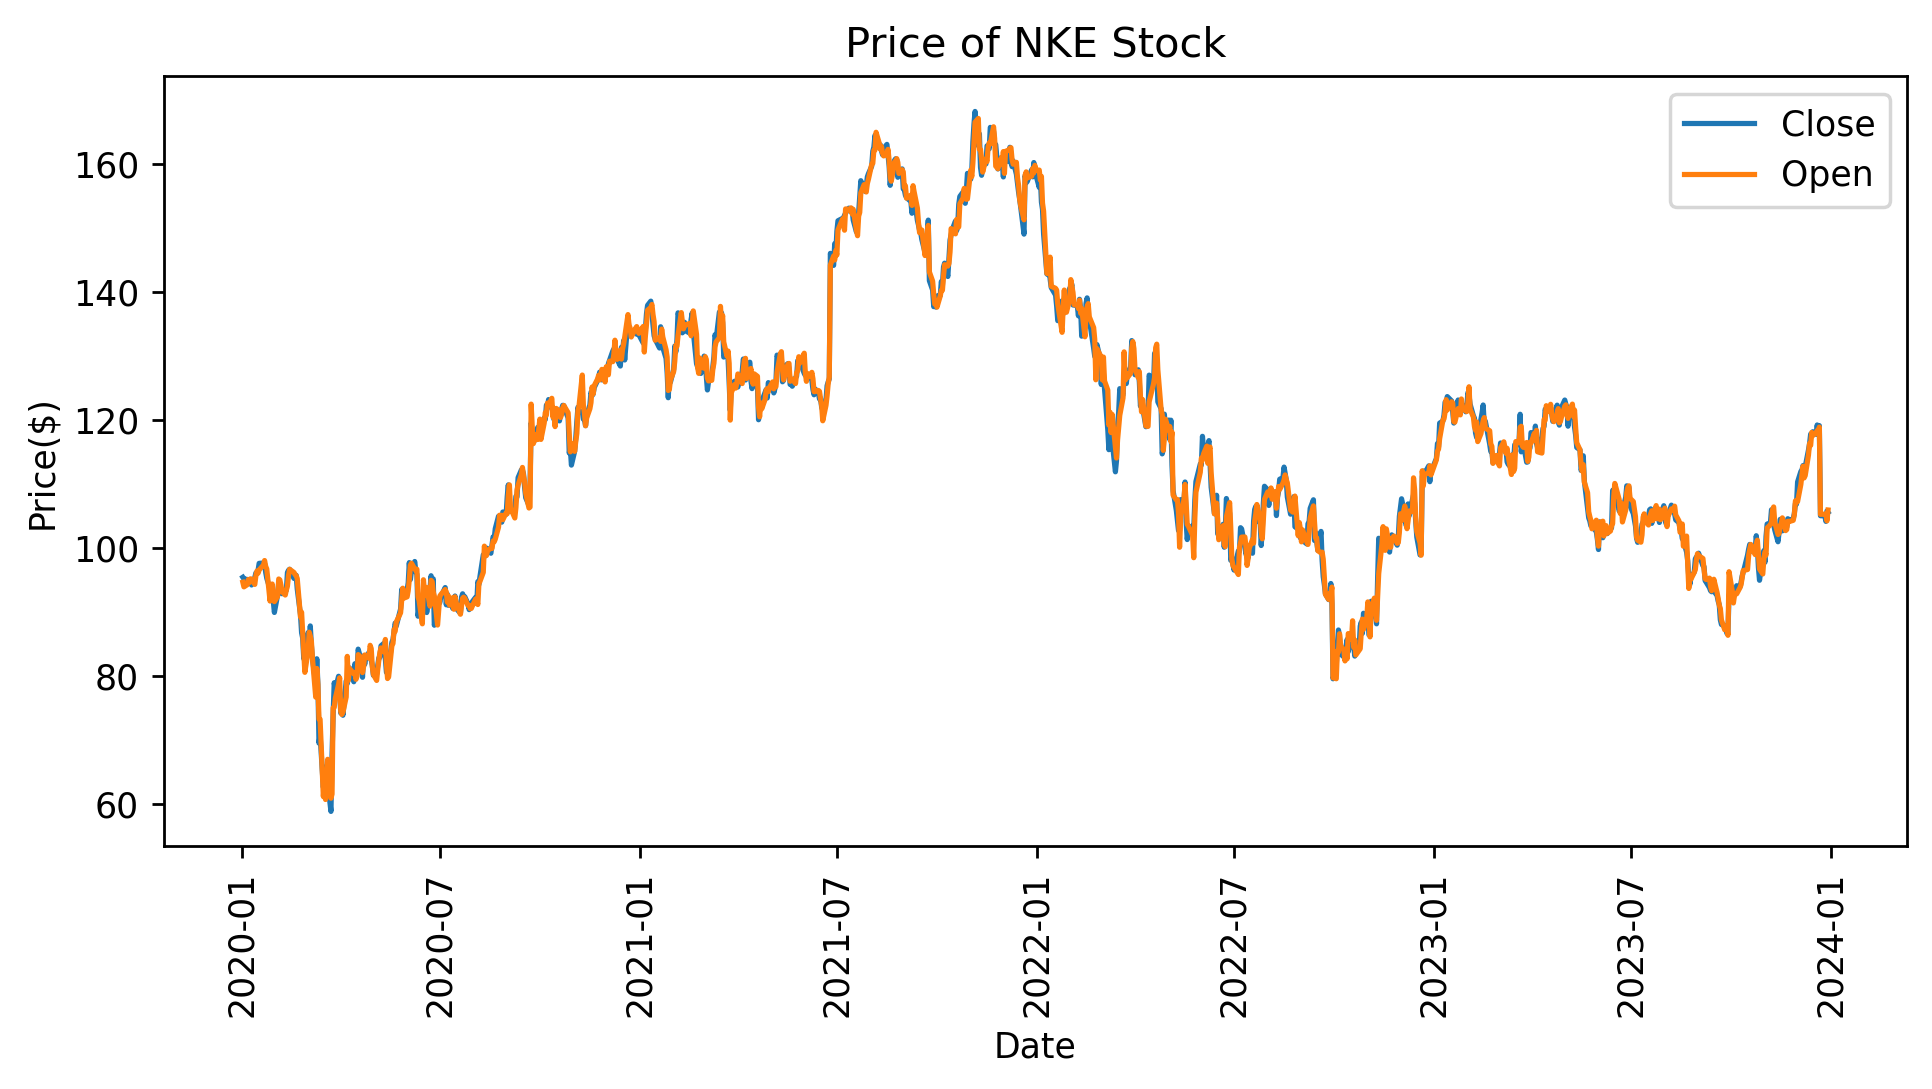

In [11]:
plt.figure(figsize=(9,4),dpi=250)
for col in ['Close', 'Open']:
    sns.lineplot(data=nike, x='Date', y=col, label=col)
plt.title('Price of NKE Stock')
plt.xticks(rotation=90)
plt.ylabel('Price($)')
plt.legend()
plt.show()

In [12]:
nike['Open-to-Close Return(%)'] = ((nike['Close'] - nike['Open'])/(nike['Open']))*100
nike['Day-to-day Return(%)'] = nike['Close'].pct_change() * 100
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%)
2,95.368210,95.377543,94.267089,94.584365,5644100,2020-01-02,0.828726,NaN
3,95.106911,95.181565,93.604534,93.865816,4541800,2020-01-03,1.322201,-0.273990
4,95.022942,95.032268,94.127116,94.201763,4612400,2020-01-06,0.871724,-0.088289
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049113
6,94.761650,95.312207,94.108439,94.537688,4942200,2020-01-08,0.236902,-0.225975
...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-11.825681
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531


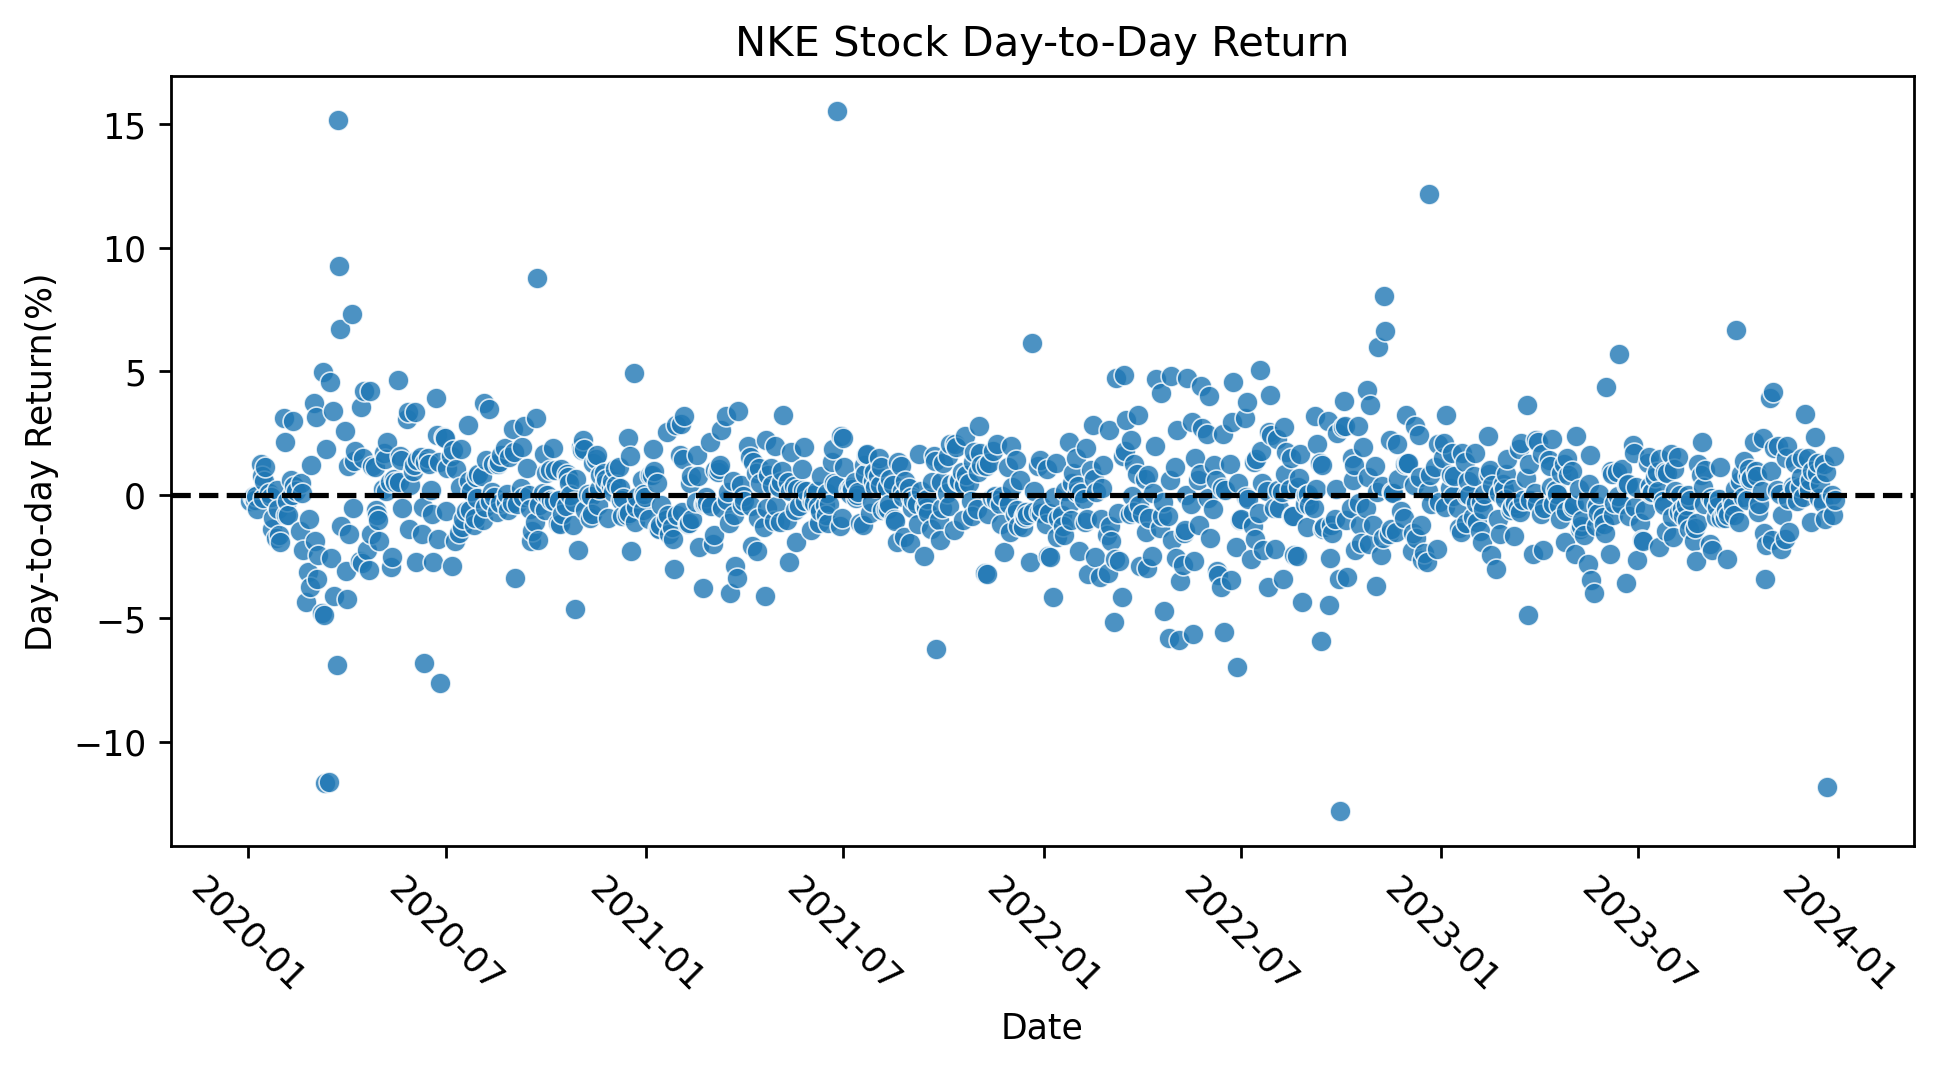

In [13]:
plt.figure(figsize=(9,4),dpi=250)
plt.title('NKE Stock Day-to-Day Return')
sns.scatterplot(data=nike, x='Date',y='Day-to-day Return(%)',alpha=0.8)
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=-45);

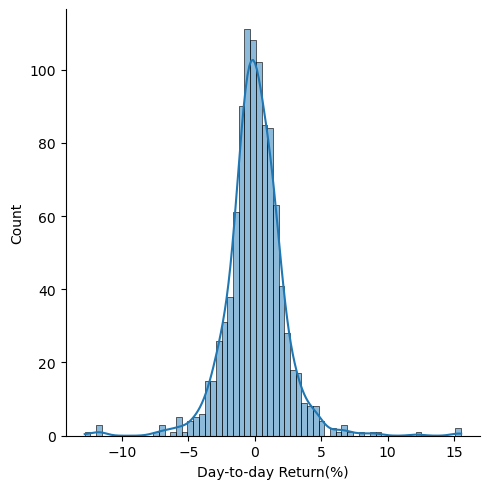

In [14]:
sns.displot(nike, x='Day-to-day Return(%)',kde=True);

In [15]:
nike['NextDayReturn'] = (nike['Close'].shift(-1) > nike['Close']).astype(int)

In [16]:
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn
2,95.368210,95.377543,94.267089,94.584365,5644100,2020-01-02,0.828726,NaN,0
3,95.106911,95.181565,93.604534,93.865816,4541800,2020-01-03,1.322201,-0.273990,0
4,95.022942,95.032268,94.127116,94.201763,4612400,2020-01-06,0.871724,-0.088289,0
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049113,0
6,94.761650,95.312207,94.108439,94.537688,4942200,2020-01-08,0.236902,-0.225975,0
...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-11.825681,0
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509,0
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929,1
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531,0


In [17]:
corr = nike.corr()

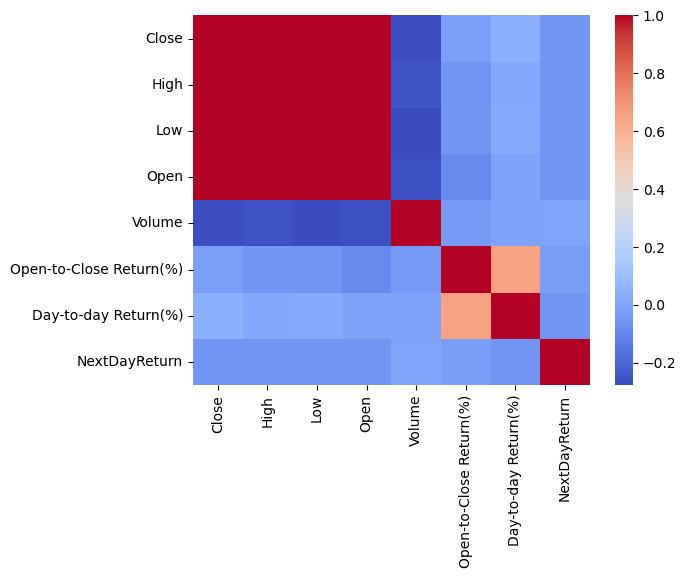

In [18]:
sns.heatmap(corr, annot=False,cmap='coolwarm');

In [19]:
nike['SMA20'] = nike['Close'].rolling(window=20).mean()

In [20]:
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20
2,95.368210,95.377543,94.267089,94.584365,5644100,2020-01-02,0.828726,NaN,0,NaN
3,95.106911,95.181565,93.604534,93.865816,4541800,2020-01-03,1.322201,-0.273990,0,NaN
4,95.022942,95.032268,94.127116,94.201763,4612400,2020-01-06,0.871724,-0.088289,0,NaN
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049113,0,NaN
6,94.761650,95.312207,94.108439,94.537688,4942200,2020-01-08,0.236902,-0.225975,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-11.825681,0,112.940047
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509,0,112.960563
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929,1,112.899582
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531,0,112.842266


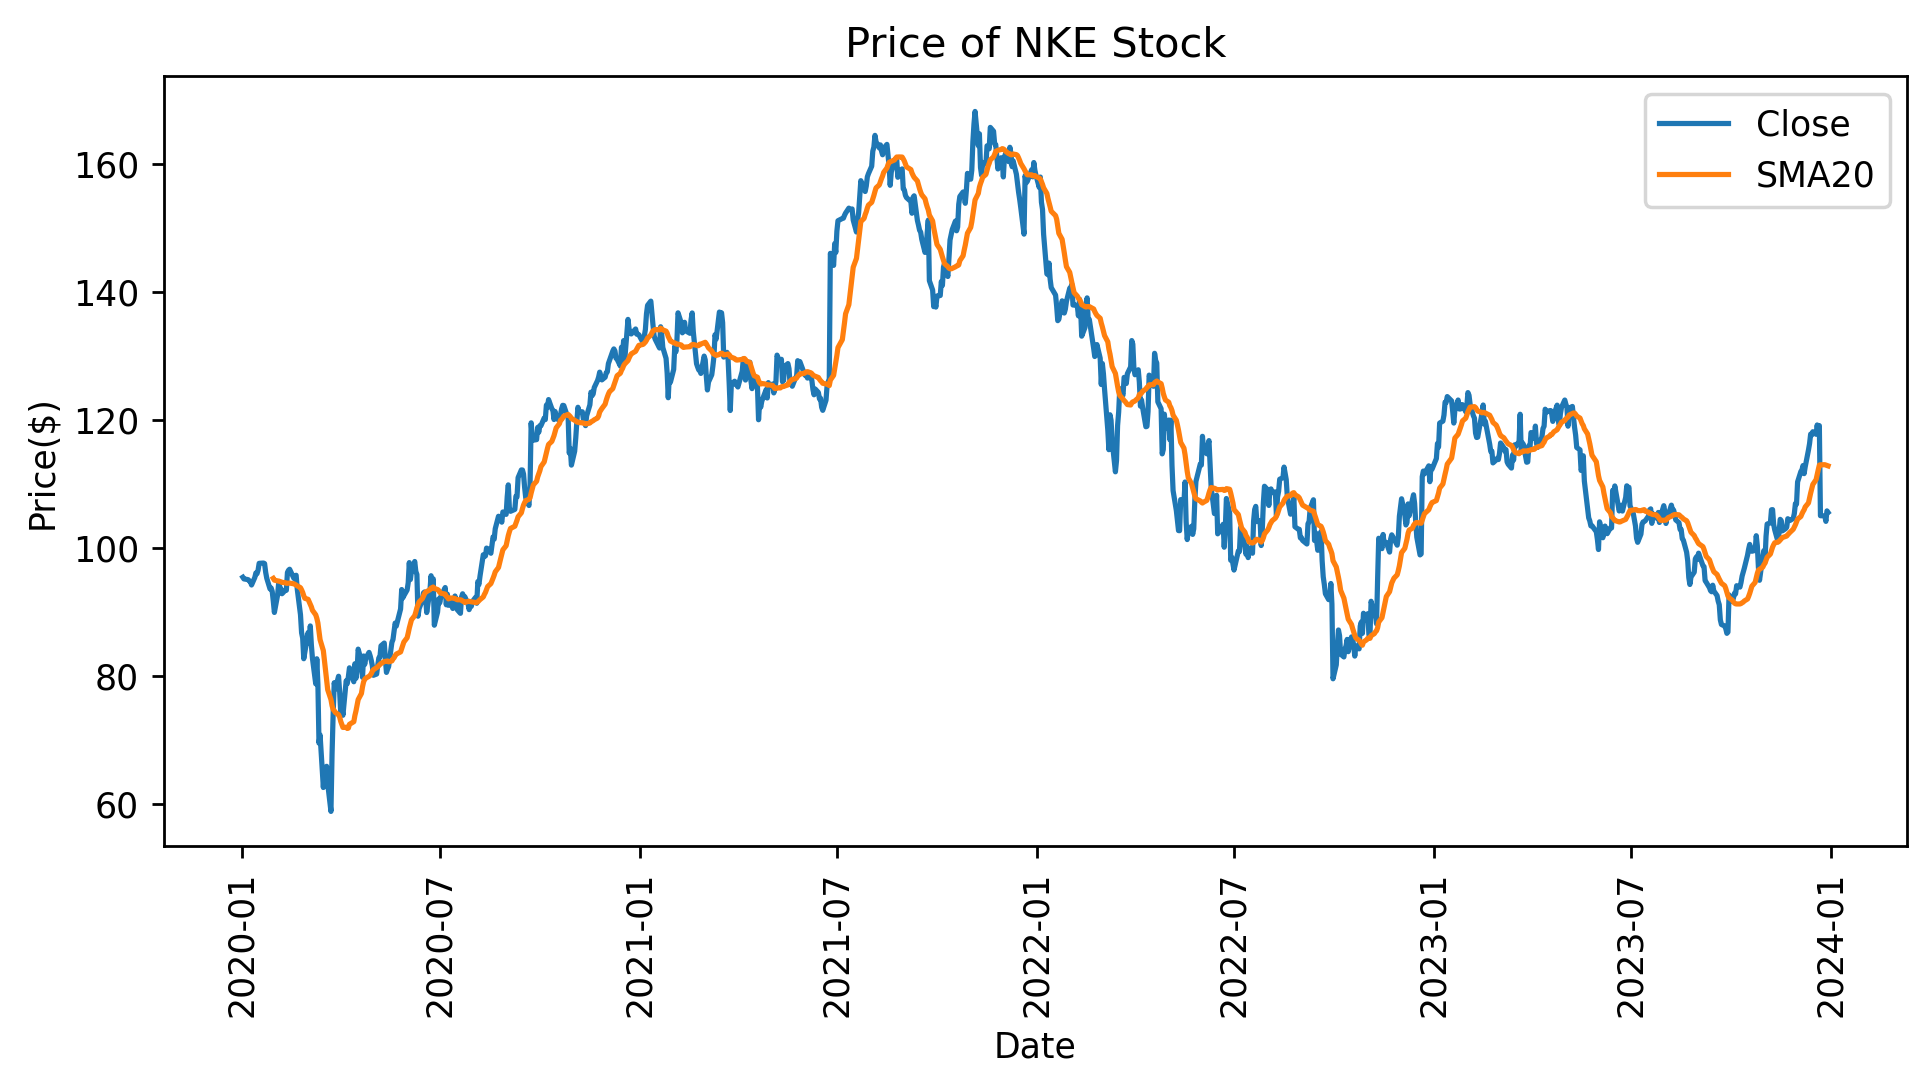

In [21]:
plt.figure(figsize=(9,4),dpi=250)
for col in ['Close', 'SMA20']:
    sns.lineplot(data=nike, x='Date', y=col, label=col)
plt.title('Price of NKE Stock')
plt.xticks(rotation=90)
plt.ylabel('Price($)')
plt.legend()
plt.show()

DateTime Analysis

In [22]:
nike['Month'] = nike['Date'].dt.month
nike['Year'] = nike['Date'].dt.year
nike['DayofWeek'] = nike['Date'].dt.day_of_week
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek
2,95.368210,95.377543,94.267089,94.584365,5644100,2020-01-02,0.828726,NaN,0,NaN,1,2020,3
3,95.106911,95.181565,93.604534,93.865816,4541800,2020-01-03,1.322201,-0.273990,0,NaN,1,2020,4
4,95.022942,95.032268,94.127116,94.201763,4612400,2020-01-06,0.871724,-0.088289,0,NaN,1,2020,0
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049113,0,NaN,1,2020,1
6,94.761650,95.312207,94.108439,94.537688,4942200,2020-01-08,0.236902,-0.225975,0,NaN,1,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-11.825681,0,112.940047,12,2023,4
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509,0,112.960563,12,2023,1
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929,1,112.899582,12,2023,2
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531,0,112.842266,12,2023,3


In [23]:
month_closing = nike.groupby('Month')['Close'].mean()
month_closing


Month
1     122.267085
2     119.629041
3     111.022701
4     111.812978
5     108.512033
6     108.782903
7     112.794628
8     117.305377
9     112.797137
10    112.643406
11    121.259070
12    127.871099
Name: Close, dtype: float64

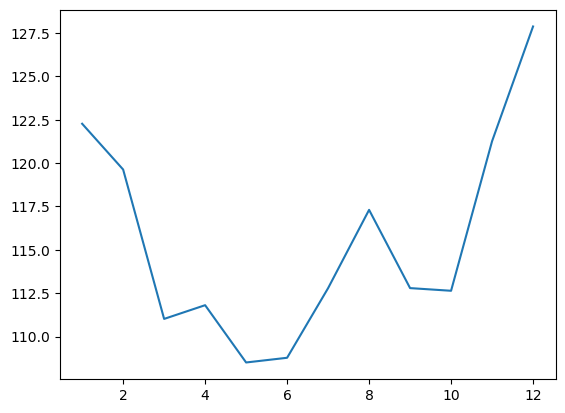

In [24]:
plt.plot(month_closing);

In [25]:
month_returns = nike.groupby('Month')['Day-to-day Return(%)'].mean()
month_returns

Month
1    -0.181214
2    -0.263630
3    -0.010346
4     0.032766
5    -0.071918
6     0.065679
7     0.245874
8    -0.029294
9    -0.344542
10    0.336617
11    0.459598
12    0.138168
Name: Day-to-day Return(%), dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Day-to-day Return(%)'>

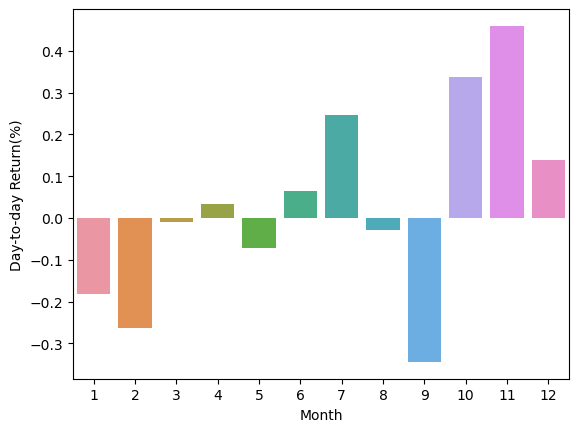

In [26]:
sns.barplot(x=month_returns.index, y=month_returns)

<AxesSubplot:xlabel='DayofWeek', ylabel='count'>

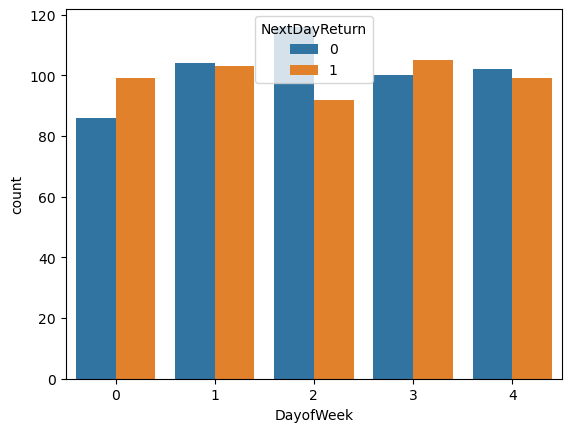

In [27]:
sns.countplot(data=nike,x='DayofWeek',hue='NextDayReturn')

Volatility

In [28]:
nike['volatility'] = nike['Day-to-day Return(%)'].rolling(window=20).std()
nike['volatility']

2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
          ...   
1003    2.985923
1004    2.985553
1005    2.987528
1006    2.989918
1007    2.990281
Name: volatility, Length: 1006, dtype: float64

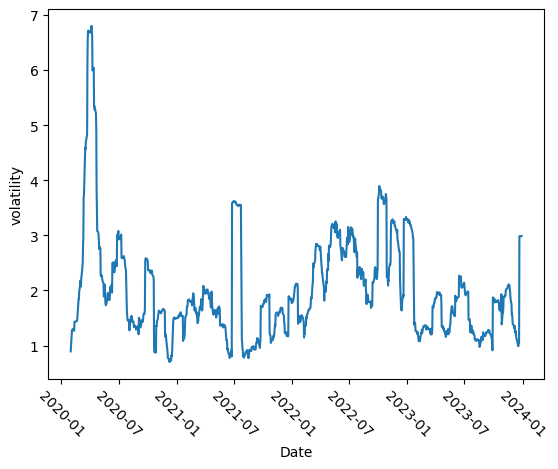

In [29]:
sns.lineplot(data=nike,x='Date',y='volatility')
plt.xticks(rotation=-45);

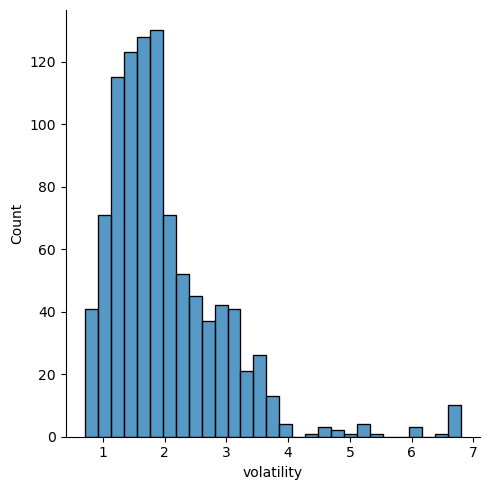

In [30]:
sns.displot(data=nike,x='volatility')

<h2>Stock Prediction using Models<h2>

Data Preperation / Cleaning

In [31]:
nike

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek,volatility
2,95.368210,95.377543,94.267089,94.584365,5644100,2020-01-02,0.828726,NaN,0,NaN,1,2020,3,NaN
3,95.106911,95.181565,93.604534,93.865816,4541800,2020-01-03,1.322201,-0.273990,0,NaN,1,2020,4,NaN
4,95.022942,95.032268,94.127116,94.201763,4612400,2020-01-06,0.871724,-0.088289,0,NaN,1,2020,0,NaN
5,94.976273,95.872098,94.071113,95.004266,6719900,2020-01-07,-0.029465,-0.049113,0,NaN,1,2020,1,NaN
6,94.761650,95.312207,94.108439,94.537688,4942200,2020-01-08,0.236902,-0.225975,0,NaN,1,2020,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-11.825681,0,112.940047,12,2023,4,2.985923
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509,0,112.960563,12,2023,1,2.985553
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929,1,112.899582,12,2023,2,2.987528
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531,0,112.842266,12,2023,3,2.989918


In [32]:
nike.isnull().sum()

Close                       0
High                        0
Low                         0
Open                        0
Volume                      0
Date                        0
Open-to-Close Return(%)     0
Day-to-day Return(%)        1
NextDayReturn               0
SMA20                      19
Month                       0
Year                        0
DayofWeek                   0
volatility                 20
dtype: int64

In [33]:
nikeDF = nike.dropna(axis=0)

In [34]:
nikeDF.head(10)

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek,volatility
22,89.862610,91.868883,89.508007,91.551614,8780300,2020-01-31,-1.844866,-1.924829,1,94.917023,1,2020,4,0.895430
23,92.634071,94.173775,91.980867,92.382123,9727000,2020-02-03,0.272724,3.084110,1,94.793381,2,2020,0,1.171484
24,94.603020,95.909435,94.491046,95.097597,6559600,2020-02-04,-0.520073,2.125512,0,94.772385,2,2020,1,1.275150
25,93.819183,95.153592,92.876697,94.957631,6108300,2020-02-05,-1.198901,-0.828553,0,94.714531,2,2020,2,1.288110
26,93.567207,94.742982,93.464567,94.155098,5641800,2020-02-06,-0.624385,-0.268576,0,94.654808,2,2020,3,1.288446
27,92.792694,93.688520,92.354111,93.137956,4121800,2020-02-07,-0.370699,-0.827761,1,94.559626,2,2020,4,1.299982
28,93.333923,93.791173,92.382111,92.587406,4213900,2020-02-10,0.806284,0.583267,0,94.518567,2,2020,0,1.303273
29,93.333923,93.641865,92.792700,93.380584,4871800,2020-02-11,-0.049968,0.000000,1,94.418719,2,2020,1,1.267928
30,96.114731,96.189385,93.725862,94.005804,8075600,2020-02-12,2.243401,2.979418,1,94.422453,2,2020,2,1.433764
31,96.459999,96.805261,94.882969,95.657487,5386800,2020-02-13,0.838943,0.359225,1,94.449515,2,2020,3,1.435380


In [35]:
nikeDF.isnull().sum() == 0

Close                      True
High                       True
Low                        True
Open                       True
Volume                     True
Date                       True
Open-to-Close Return(%)    True
Day-to-day Return(%)       True
NextDayReturn              True
SMA20                      True
Month                      True
Year                       True
DayofWeek                  True
volatility                 True
dtype: bool

In [36]:
winsorizedClosing = winsorize(nikeDF['Open-to-Close Return(%)'],(0.05,0.05)).data
nikeDF['Open-to-Close Return(%)'] = winsorizedClosing

In [37]:
winsorizedRet = winsorize(nikeDF['Day-to-day Return(%)'],(0.05,0.05)).data
nikeDF['Day-to-day Return(%)'] = winsorizedRet

In [38]:
winsorizedVol = winsorize(nikeDF['volatility'],(0.05,0.05)).data
nikeDF['volatility'] = winsorizedVol

In [39]:
nikeDF

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,Month,Year,DayofWeek,volatility
22,89.862610,91.868883,89.508007,91.551614,8780300,2020-01-31,-1.844866,-1.924829,1,94.917023,1,2020,4,0.930657
23,92.634071,94.173775,91.980867,92.382123,9727000,2020-02-03,0.272724,3.084110,1,94.793381,2,2020,0,1.171484
24,94.603020,95.909435,94.491046,95.097597,6559600,2020-02-04,-0.520073,2.125512,0,94.772385,2,2020,1,1.275150
25,93.819183,95.153592,92.876697,94.957631,6108300,2020-02-05,-1.198901,-0.828553,0,94.714531,2,2020,2,1.288110
26,93.567207,94.742982,93.464567,94.155098,5641800,2020-02-06,-0.624385,-0.268576,0,94.654808,2,2020,3,1.288446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-3.198699,0,112.940047,12,2023,4,2.985923
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509,0,112.960563,12,2023,1,2.985553
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929,1,112.899582,12,2023,2,2.987528
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531,0,112.842266,12,2023,3,2.989918


Logistic Regression

In [40]:
nikeDum = pd.get_dummies(nikeDF, columns=['Month', 'Year', 'DayofWeek'], drop_first=True)

In [41]:
nikeDum

,Close,High,Low,Open,Volume,Date,Open-to-Close Return(%),Day-to-day Return(%),NextDayReturn,SMA20,...,Month_10,Month_11,Month_12,Year_2021,Year_2022,Year_2023,DayofWeek_1,DayofWeek_2,DayofWeek_3,DayofWeek_4
22,89.862610,91.868883,89.508007,91.551614,8780300,2020-01-31,-1.844866,-1.924829,1,94.917023,...,0,0,0,0,0,0,0,0,0,1
23,92.634071,94.173775,91.980867,92.382123,9727000,2020-02-03,0.272724,3.084110,1,94.793381,...,0,0,0,0,0,0,0,0,0,0
24,94.603020,95.909435,94.491046,95.097597,6559600,2020-02-04,-0.520073,2.125512,0,94.772385,...,0,0,0,0,0,0,1,0,0,0
25,93.819183,95.153592,92.876697,94.957631,6108300,2020-02-05,-1.198901,-0.828553,0,94.714531,...,0,0,0,0,0,0,0,1,0,0
26,93.567207,94.742982,93.464567,94.155098,5641800,2020-02-06,-0.624385,-0.268576,0,94.654808,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,104.985367,107.667335,104.412044,105.199148,46642900,2023-12-22,-0.203216,-3.198699,0,112.940047,...,0,0,1,0,0,1,0,0,0,1
1004,104.965935,105.616997,104.441209,105.238025,12846700,2023-12-26,-0.258547,-0.018509,0,112.960563,...,0,0,1,0,0,1,1,0,0,0
1005,104.101089,105.519810,103.829007,105.276878,10157900,2023-12-27,-1.116854,-0.823929,1,112.899582,...,0,0,1,0,0,1,0,1,0,0
1006,105.743317,106.306920,103.790144,104.178836,9352900,2023-12-28,1.501726,1.577531,0,112.842266,...,0,0,1,0,0,1,0,0,1,0


In [42]:
X = nikeDum.drop(['Date','NextDayReturn'],axis=1)
y = nikeDum['NextDayReturn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegressionCV

log_model = LogisticRegressionCV()

In [47]:
log_model.fit(X_train_sc,y_train)

LogisticRegressionCV()

In [48]:
log_model.C_

array([2.7825594])

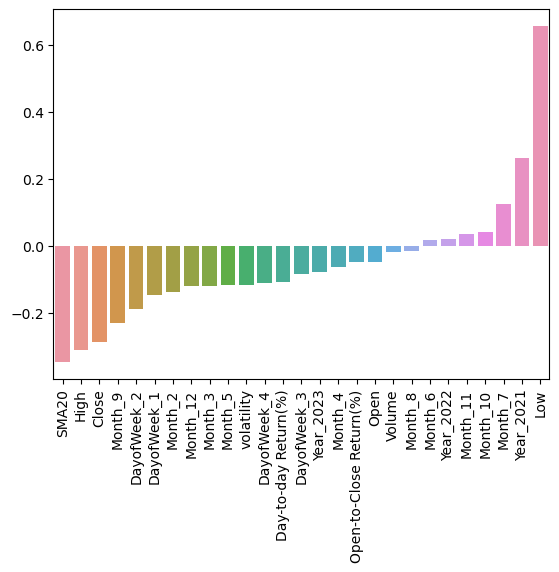

In [49]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0]).sort_values()
sns.barplot(x=coefs.index,y=coefs.values)
plt.xticks(rotation=90);

In [50]:
from sklearn.metrics import classification_report

yPreds = log_model.predict(X_test_sc)

In [51]:
print(classification_report(y_test,yPreds))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43       103
           1       0.44      0.53      0.48        95

    accuracy                           0.45       198
   macro avg       0.46      0.46      0.45       198
weighted avg       0.46      0.45      0.45       198



RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
rfc = RandomForestClassifier()

In [58]:
n_estimators = [64,100,128,175]
max_features = ['auto','log2','sqrt']
bootstrap = [True,False]
oob_score = [True,False]

In [59]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score
}

In [60]:
grid = GridSearchCV(rfc,param_grid)

In [61]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [64, 100, 128, 175],
                         'oob_score': [True, False]})

In [62]:
grid.best_params_

{'bootstrap': False,
 'max_features': 'auto',
 'n_estimators': 128,
 'oob_score': False}

In [63]:
pred = grid.predict(X_test)

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       103
           1       0.47      0.49      0.48        95

    accuracy                           0.48       198
   macro avg       0.49      0.49      0.48       198
weighted avg       0.49      0.48      0.49       198

